<a href="https://colab.research.google.com/github/IsaacMartindeDiego/IA/blob/master/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este cuaderno trabajaremos con el conjunto de datos de cáncer de mama de Wisconsin, que registra las mediciones clínicas de los tumores de cáncer de mama. Cada tumor se etiqueta como "benigno" (para tumores inofensivos) o "maligno" (para tumores cancerígenos). Lay la tarea consiste en aprender a predecir si un tumor es maligno basándose en las mediciones del tejido.


#**Adquisición de datos**

En este caso, como los datos están en la librería scikit-learn los podemos leer con la función load_brest_cancer.

In [7]:
# The data can be loaded using the load_breast_cancer function from scikit-learn
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer=load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:


print('Shape of cancer data : {}'.format(cancer.data.shape))



Shape of cancer data : (569, 30)


Comprobamos la distribución de la variable objetivo.

In [4]:
print("Frecuencia por clase:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Frecuencia por clase:
{'malignant': 212, 'benign': 357}


A continuación vemos las características que emplearemos para predecir la variable respuesta.

In [5]:


print('Feature names:{}'.format(cancer.feature_names))



Feature names:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# **Crear la muestra de test y de entrenamiento**

Particionamos los datos en dos conjuntos para entrenar nuestro modelo y para validarlo después.

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(cancer.data,
                                              cancer.target,
                                              random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


y creamos y visualizamos el **Data Frame** con la estructura adecuada para su explotación.

In [9]:
import pandas as pd

df=pd.DataFrame(X_train,columns=cancer.feature_names)

# looking at dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


# **Modelización**

Elegimos un modelo sencillo, el modelo de los *K vecinos más cercanos*. La clase de una nueva observación se aprende a partir de las clases de las *K* observaciones más cercanas de acuerdo a una distancia predefinida.

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)



Una vez entrenado el modelo, podemos pasar a usarlo para la predicción de nuevas observaciones (test).

In [19]:


prediction=knn.predict(X_test)
prediction

from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)
#print('Train Test Score: {:.2f}'.format(np.mean(prediction==y_test)))



0.916083916083916

Matriz de confusión

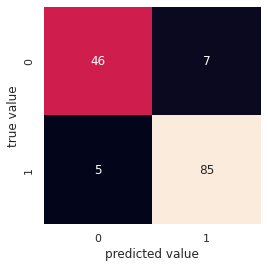

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


mat = confusion_matrix(y_test, prediction)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# **Ajuste de los parámetros del modelo**

Estudiamos el efecto del parámetro del modelo

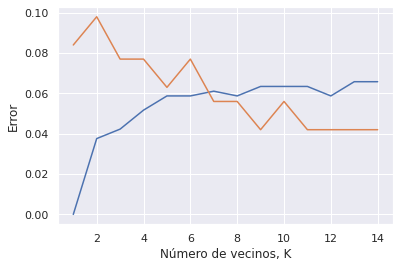

In [26]:


training_error=[]
test_error=[]
# n vecinos de 1 a 15
neighbors_setting=range(1,15)

for n_neighbores in neighbors_setting:
    #construimos el modelo
    clf=KNeighborsClassifier(n_neighbors=n_neighbores)
    clf.fit(X_train,y_train)
    training_error.append(1-clf.score(X_train,y_train))
    test_error.append(1-clf.score(X_test,y_test))


plt.plot(neighbors_setting,training_error,label='training_accuracy')
plt.plot(neighbors_setting,test_error,label='test accuracy')
plt.ylabel('Error')
plt.xlabel('Número de vecinos, K')
plt.show()

